In [3]:

# Create a sample sales dataset as a CSV file

import pandas as pd

# Sample sales data
data = {
    "Date": [
        "2024-01-05", "2024-01-10", "2024-01-15", "2024-01-20", "2024-01-25",
        "2024-02-01", "2024-02-05", "2024-02-10", "2024-02-15", "2024-02-20",
        "2024-03-05", "2024-03-10", "2024-03-15", "2024-03-20", "2024-03-25",
        "2024-04-01", "2024-04-05", "2024-04-10", "2024-04-15", "2024-04-20"
    ],
    "Product": [
        "Laptop", "Smartphone", "Tablet", "Headphones", "Smartwatch",
        "Monitor", "Keyboard", "Mouse", "Speaker", "Router",
        "Laptop", "Smartphone", "Tablet", "Headphones", "Smartwatch",
        "Monitor", "Keyboard", "Mouse", "Speaker", "Router"
    ],
    "Category": [
        "Electronics", "Electronics", "Electronics", "Accessories", "Accessories",
        "Electronics", "Accessories", "Accessories", "Accessories", "Electronics",
        "Electronics", "Electronics", "Electronics", "Accessories", "Accessories",
        "Electronics", "Accessories", "Accessories", "Accessories", "Electronics"
    ],
    "Quantity": [3, 5, 2, 10, 4, 6, 8, 12, 5, 7, 2, 6, 3, 8, 3, 4, 10, 15, 6, 5],
    "Price": [800, 600, 400, 50, 200, 300, 40, 25, 150, 120, 850, 650, 420, 55, 210, 320, 42, 27, 160, 130]
}
df=pd.DataFrame(data)

In [6]:
df.to_csv("D://pandas//sales_data.csv")


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df.head()

,Date,Product,Category,Quantity,Price
0,2024-01-05,Laptop,Electronics,3,800
1,2024-01-10,Smartphone,Electronics,5,600
2,2024-01-15,Tablet,Electronics,2,400
3,2024-01-20,Headphones,Accessories,10,50
4,2024-01-25,Smartwatch,Accessories,4,200


In [21]:
#first step 
#data cleaning

In [23]:
df.isnull().sum()#check missing values 

Date        0
Product     0
Category    0
Quantity    0
Price       0
dtype: int64

In [25]:
# Fill missing values (Example: Fill missing price with the median price)
df["Price"].fillna(df["Price"].median(), inplace=True)#there are no missing value 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17960\4231475340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Price"].fillna(df["Price"].median(), inplace=True)


In [30]:
df.head()

,Date,Product,Category,Quantity,Price
0,2024-01-05,Laptop,Electronics,3,800
1,2024-01-10,Smartphone,Electronics,5,600
2,2024-01-15,Tablet,Electronics,2,400
3,2024-01-20,Headphones,Accessories,10,50
4,2024-01-25,Smartwatch,Accessories,4,200


In [27]:
df["Date"] = pd.to_datetime(df["Date"])  # Convert to datetime


In [29]:
df.tail()

,Date,Product,Category,Quantity,Price
15,2024-04-01,Monitor,Electronics,4,320
16,2024-04-05,Keyboard,Accessories,10,42
17,2024-04-10,Mouse,Accessories,15,27
18,2024-04-15,Speaker,Accessories,6,160
19,2024-04-20,Router,Electronics,5,130


In [ ]:
#add new column

In [34]:
df['total_sales']=df['Quantity']*df['Price']

In [35]:
df.head()

,Date,Product,Category,Quantity,Price,total_sales
0,2024-01-05,Laptop,Electronics,3,800,2400
1,2024-01-10,Smartphone,Electronics,5,600,3000
2,2024-01-15,Tablet,Electronics,2,400,800
3,2024-01-20,Headphones,Accessories,10,50,500
4,2024-01-25,Smartwatch,Accessories,4,200,800


In [36]:
#so we can anylize total of revenue 

In [38]:
total_revenue=df['total_sales'].sum()

In [40]:
total_revenue

23155

In [41]:
#finding top selling product

In [48]:
topsell=df.groupby('Product')['total_sales'].sum().sort_values(ascending=False)

In [50]:
topsell

Product
Smartphone    6900
Laptop        4100
Monitor       3080
Tablet        2060
Speaker       1710
Router        1490
Smartwatch    1430
Headphones     940
Keyboard       740
Mouse          705
Name: total_sales, dtype: int64

In [51]:
topsell.head(1)#this is the topselling product 

Product
Smartphone    6900
Name: total_sales, dtype: int64

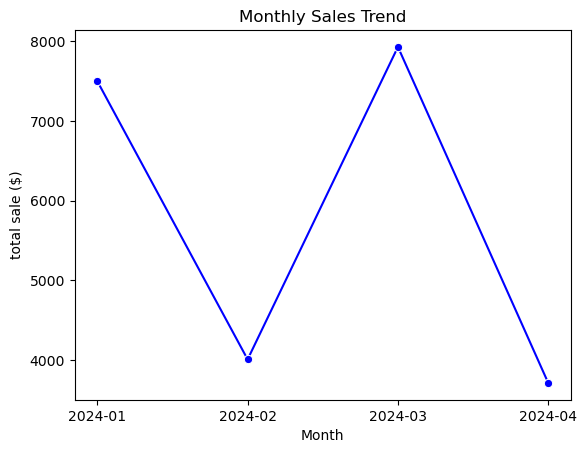

In [73]:
df["Month"] = df["Date"].dt.to_period("M")  # Extract Month-Year
monthly_sales = df.groupby("Month")["total_sales"].sum()

# Plot Sales Trend
#plt.figure(figsize=(10,5) )#we also give size 
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o", color="blue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("total sale ($)")
plt.show()


In [60]:
#category sale by using top sales

In [61]:
category_sales=df.groupby('Category')['total_sales'].sum()

Text(0, 0.5, 'total sales ')

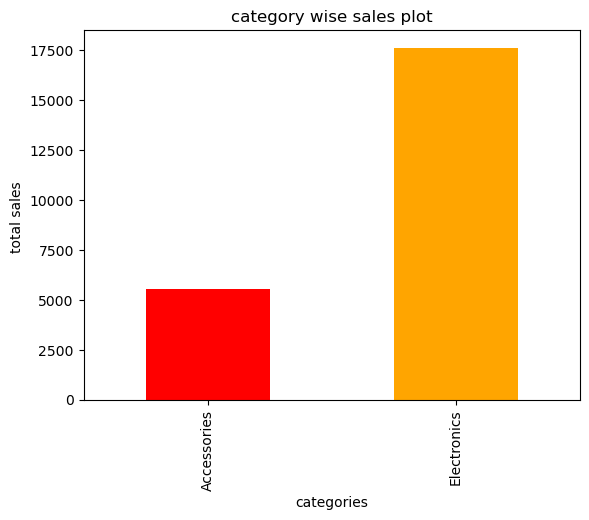

In [70]:
category_sales.plot(kind="bar",color=['red','orange'],title='category wise sales plot')
plt.xlabel('categories')
plt.ylabel('total sales ')

In [74]:
df

,Date,Product,Category,Quantity,Price,total_sales,Month
0,2024-01-05,Laptop,Electronics,3,800,2400,2024-01
1,2024-01-10,Smartphone,Electronics,5,600,3000,2024-01
2,2024-01-15,Tablet,Electronics,2,400,800,2024-01
3,2024-01-20,Headphones,Accessories,10,50,500,2024-01
4,2024-01-25,Smartwatch,Accessories,4,200,800,2024-01
5,2024-02-01,Monitor,Electronics,6,300,1800,2024-02
6,2024-02-05,Keyboard,Accessories,8,40,320,2024-02
7,2024-02-10,Mouse,Accessories,12,25,300,2024-02
8,2024-02-15,Speaker,Accessories,5,150,750,2024-02
9,2024-02-20,Router,Electronics,7,120,840,2024-02


In [ ]:
#operations in that project is
#data cleaning 
#total revenue 
#find top selling product 
#create linegram of monthly sales 
#create bar of category wise sale 